In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from collections import defaultdict
import pprint
import pandas as pd

In [4]:
# Assignment Constants
RANDOM_STATE = 10
FIGSIZE = (12,8)
#### Use the following line before plt.plot(....) to increase the plot size ####
# plt.figure(figsize=FIGSIZE)

## Question 1
Use the breast cancer data set from Homework 0 to create a training set. Recall that the
label is 0 if the patient’s data indicates a malignant cancer and 1 otherwise. Compute the
base rate of malignant cancer occurrence over the entire data set. In other words, what would
be your best guess for the probability of malignant cancer of a single example using only the
labels in the training set? This question is very simple, so try not to overthink it.

In [5]:
#load data set as cancer
cancer = load_breast_cancer()

# Convert data to pandas DataFrame:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

# Add 'target' key for convenience
df['target'] = cancer.target

# How many malignant cases do we have?
target = df['target']
m = np.where(target == 0)[0]
mal_case = len(m)
#print(mal_case)

# How many non-malignant ("other") cases do we have?
o = np.where(target == 1)[0]
other_case = len(o)
#print(other_case)

# What is the probability of malignant cancer
prob = (mal_case)/(mal_case+other_case)
print("The probability is",prob)

The probability is 0.37258347978910367


## 2
The goal is to build a decision tree that, based on the other features in the set, predicts
whether or not a patient has malignant cancer. So this is a classification problem. Using
`tree.DecisionTreeClassifier` and other functions in the scikit-learn library, one can build
a decision tree and calculate both its training accuracy when fitted to the entire data set as
well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).
In this question you will need to complete two sub-components:
### (a)
(a) Make a plot visualizing the performance of a `tree.DecisionTreeClassifier` as you
search for an optimal `max_depth` parameter. Vary the depth of your decision tree using
max depth = 1,2,. . . ,10 and record the results from the following evaluation procedures
for each setting:
* The accuracy when training and testing on the full dataset.
* 10-fold cross-validated accuracy.

Plot the results of both evaluation procedures on the same plot with evaluation scores on
the y-axis and max depth values on the x-axis. Use 10 as your random seed/state for the
decision tree and the cross-validation. Use a legend to label both evaluation procedures.


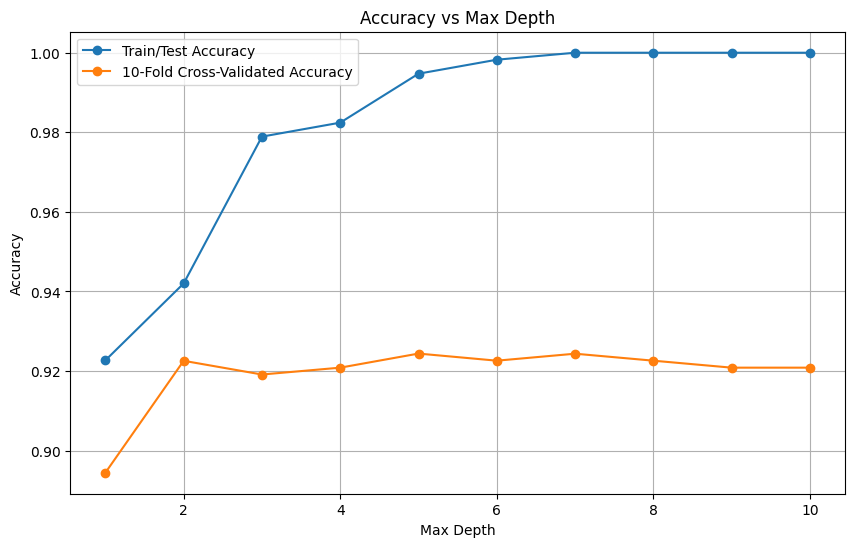

[0.8944235588972431, 0.9225563909774437, 0.919110275689223, 0.9208333333333334, 0.9243734335839597, 0.9225877192982456, 0.9243421052631579, 0.9225877192982456, 0.9208333333333332, 0.9208333333333332]


In [6]:
# Load the dataset
X, y = cancer.data, cancer.target

# Initialize KFold with a fixed random state
kf = KFold(n_splits=10, shuffle=True, random_state=10)

# Initialize variables to store results
train_test_acc = []
cross_val_acc = []

#Set range
max_depth_range = range(1, 11)

# Loop over max_depth values from 1 to 10
for depth in range(1, 11):
    # Create and train the DecisionTreeClassifier with the given max_depth
    clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=10)

    # Train/test accuracy
    clf.fit(X, y)
    train_test_acc.append(clf.score(X, y))

    # 10-fold cross-validation accuracy
    cv_scores = cross_val_score(clf, X, y, cv=kf)
    cross_val_acc.append(np.mean(cv_scores))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_test_acc, label='Train/Test Accuracy', marker='o')
plt.plot(max_depth_range, cross_val_acc, label='10-Fold Cross-Validated Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()
print(cross_val_acc)

### (b)
Answer the questions below based on the results of 2a. Write your answers in the
corresponding field in the markdown cell that is present in the HW1 template notebook.
Do this by double clicking the markdown cell and writing your answer directly in the
cell. Pressing enter will re-render the markdown.

#### (i.)
What setting of `max_depth` gave the best accuracy w.r.t. the **full-dataset** accuracy?
If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** The graph shows that the full-dataset accuracy (blue line) reaches its highest accuracy at a max depth of 7 and continues to maintain that high accuracy for all values from 7 to 10. Therefore, the best settings of max_depth that gave the highest full-dataset accuracy are 7, 8, 9, and 10.

#### (ii.)
What setting of `max_depth`  gave the best accuracy w.r.t. the **cross-
validated** accuracy? If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** The graph shows that the cross-validated accuracy (orange line) reaches its highest accuracy at a max depth of 5. However, this is a visual inspection, and we would need to print(cross_val_acc) to confirm the accuracy values for each point.



## 3\.
This question explores random forest classifiers by using scikit-learn’s `ensemble.RandomForestClassifier`.
You will make two plots and answer questions about them.

### (a)
For the first plot, use a `ensemble.RandomForestClassifier` and the best depth you
found 2(b)ii as `max_depth`. We will now find the optimal setting of a second parameter,
n estimators. Vary the number of trees in the forest via the parameter `n_estimators`
and plot its 10-fold cross-validated accuracy (use `n_estimators` = 1, 2, . . . , 20). Again,
use 10 as your random seed for your classifier and cross-validation.

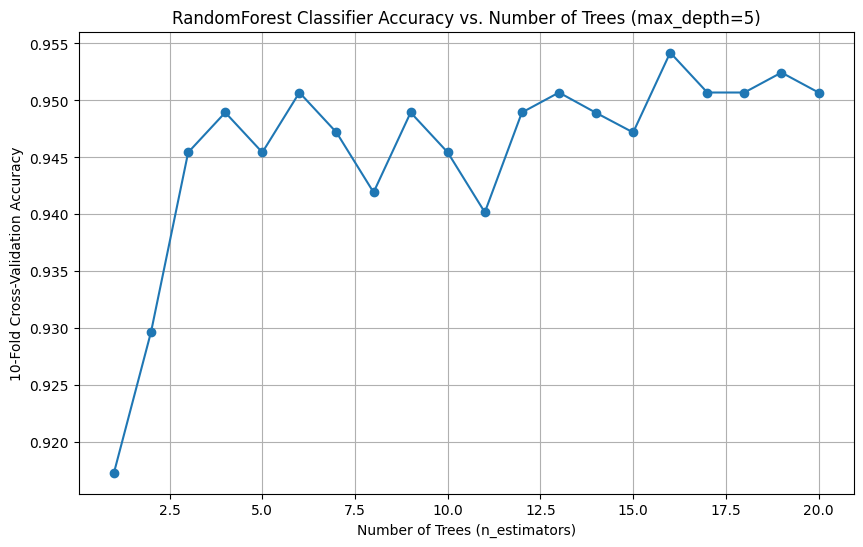

[0.9172932330827068, 0.9296679197994988, 0.9454260651629072, 0.9489348370927317, 0.9454260651629072, 0.950689223057644, 0.9471804511278193, 0.9419172932330826, 0.9489348370927319, 0.9454260651629072, 0.9401629072681704, 0.9489348370927317, 0.950689223057644, 0.9489035087719297, 0.9471804511278196, 0.9541979949874687, 0.950689223057644, 0.950689223057644, 0.9524436090225563, 0.950689223057644]


In [8]:
# Determine the best max_depth from the previous analysis
best_max_depth = max_depth_range[np.argmax(cross_val_acc)]

# Initialize list to store cross-validated accuracy
rf_cross_val_accuracies = []

# Vary the number of trees in the forest
n_estimators_range = range(1, 21)

for n_estimators in n_estimators_range:
    # Initialize the RandomForestClassifier with the best max_depth and varying n_estimators
    rf_clf = ensemble.RandomForestClassifier(max_depth=best_max_depth, n_estimators=n_estimators, random_state=10)

    # Calculate the 10-fold cross-validated accuracy
    rf_cross_val_accuracy = np.mean(cross_val_score(rf_clf, X, y, cv=(KFold(n_splits=10,random_state=10,shuffle=True))))
    rf_cross_val_accuracies.append(rf_cross_val_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, rf_cross_val_accuracies, label='10-Fold Cross-Validation Accuracy', marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('10-Fold Cross-Validation Accuracy')
plt.title(f'RandomForest Classifier Accuracy vs. Number of Trees (max_depth={best_max_depth})')
plt.grid(True)
plt.show()
print(rf_cross_val_accuracies)

### (b)
Do you see an improvement using random forests versus using a single tree? (Note: use
the `n_estimators`=1 result as the result for a single tree.)

**Student answer here:** When compared to the previous chart, yes - you can see an improvements using random forests. The accuracy is higher.

### (c)
What setting of `n_estimators` gave the best accuracy w.r.t. the cross-validated accuracy?

**Student answer here:** The graph shows that the cross-validated accuracy (blue line) reaches its highest accuracy at n_estimators equal to 16.

### (d)
For the second plot, again use a `ensemble.RandomForestClassifier`, but this time
you will fix the `n_estimators` parameter and again attempt to find the optimal setting
of a `max_depth`. Use your answer to 3c as the setting for `n_estimators` and follow the
procedure from 2a to find the best setting for max depth. This time, only plot the results
from cross-validation and not the full set, but the plot should be the same structure
as in 2a otherwise (use `max_depth` = 1,2,. . . ,10). Again, use 10 as your random seed.

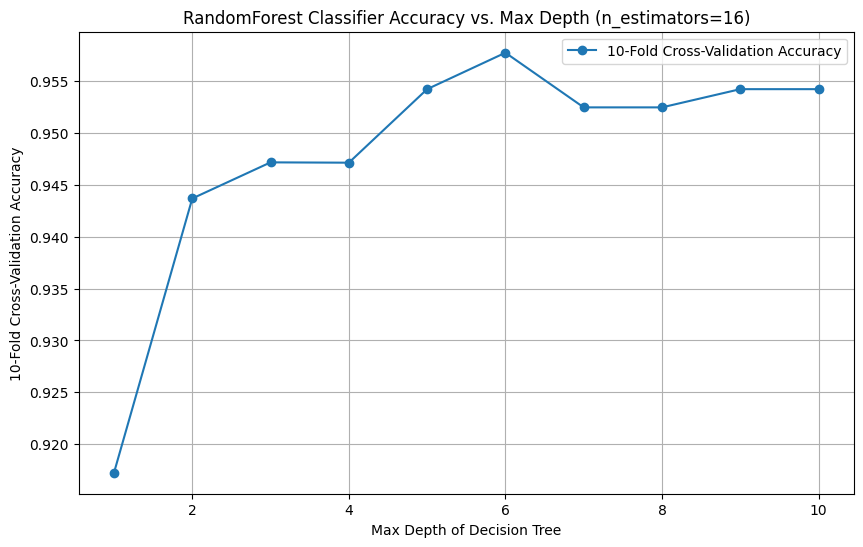

In [9]:
# Fix the optimal n_estimators found in the previous step
optimal_n_estimators = n_estimators_range[np.argmax(rf_cross_val_accuracies)]

# Initialize list to store cross-validated accuracy
rf_cross_val_accuracies_depth = []

# Vary the depth of the decision tree
max_depth_range = range(1, 11)

for max_depth in max_depth_range:
    # Initialize the RandomForestClassifier with the fixed n_estimators and varying max_depth
    rf_clf = ensemble.RandomForestClassifier(max_depth=max_depth, n_estimators=optimal_n_estimators, random_state=10)

    # Calculate the 10-fold cross-validated accuracy
    rf_cross_val_accuracy_depth = np.mean(cross_val_score(rf_clf, X, y, cv=(KFold(n_splits=10,random_state=10,shuffle=True))))
    rf_cross_val_accuracies_depth.append(rf_cross_val_accuracy_depth)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, rf_cross_val_accuracies_depth, label='10-Fold Cross-Validation Accuracy', marker='o')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('10-Fold Cross-Validation Accuracy')
plt.title(f'RandomForest Classifier Accuracy vs. Max Depth (n_estimators={optimal_n_estimators})')
plt.legend()
plt.grid(True)
plt.show()

### (e)
In the plot in 3d, is the optimal setting of `max_depth` the same as in 2(b)ii? If not, what
is the new optimal setting of `max_depth`?

**Student answer here:** The graph shows that the 10-fold cross-validated accuracy (blue line) reaches its highest accuracy at max_depth of 6.

## 4\.
For this last question, we will explore the dependability of our estimates.
### (a)
Make a plot using the following procedure:
#### i.
Using random state values from 0, 1, · · · , 99 calculate the 10-fold cross-validation
accuracy of different `tree.DecisionTreeClassifiers` with max depth settings from
1, 2, · · · , 10.
As before, you should use the same random state value for your classifier and cross-validation.
#### ii.
Then record the best max depth settings for each random state. Be sure to check whether multiple settings
achieve the best accuracy.


Plot the counts for the best max depth settings as a bar chart with the max depth settings on the x-axis and the 'best parameter counts' on the y-axis (number of times that parameter was selected as the best max depth setting).

*Note*: this calculation might take some time. For debugging, try a smaller range of
random states.

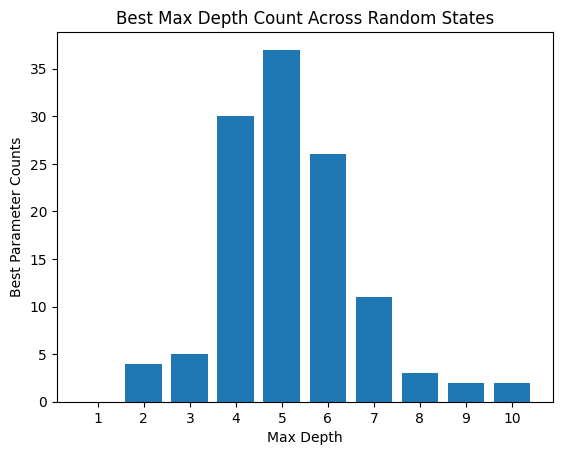

In [11]:
# Define the range for max_depth and random states
max_depth_range = range(1, 11)  # max_depth from 1 to 10
random_state_range = range(100)  # random states from 0 to 99

# Initialize a dictionary to store best max_depth counts
best_max_depth_counts = {depth: 0 for depth in max_depth_range}

# Loop over random states
for random_state in random_state_range:
    best_accuracy = 0
    best_depths = []

    # Loop over max_depth values
    for max_depth in max_depth_range:
        # Create DecisionTreeClassifier with specific random_state and max_depth
        clf = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)

        # Perform 10-fold cross-validation and calculate the mean accuracy
        accuracy = np.mean(cross_val_score(clf, X, y, cv=(KFold(n_splits=10,random_state=random_state,shuffle=True))))

        # Track the best max_depth for this random state
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_depths = [max_depth]
        elif accuracy == best_accuracy:
            best_depths.append(max_depth)

    # Increment the counts for the best max_depths
    for best_depth in best_depths:
        best_max_depth_counts[best_depth] += 1

# Plot the results
plt.bar(best_max_depth_counts.keys(), best_max_depth_counts.values())
plt.xlabel('Max Depth')
plt.ylabel('Best Parameter Counts')
plt.title('Best Max Depth Count Across Random States')
plt.xticks(max_depth_range)
plt.show()

### (b)
What are the top two most frequent parameter settings?

**Student answer here:** The two most frequenct parameter settings are max depths of 5 and 4.
